In [2]:
import pandas as pd


In [4]:
df= pd.read_csv('Mall_Customers.csv')

In [14]:
df

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

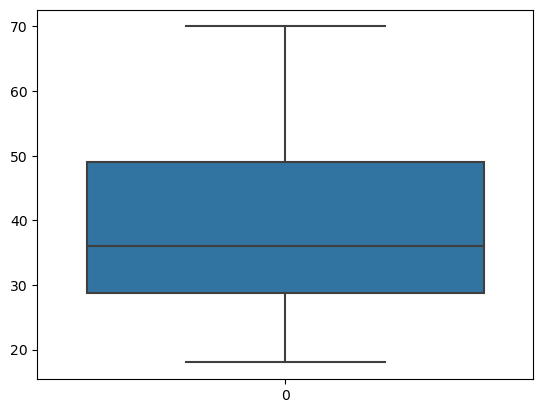

In [17]:
sns.boxplot(data=df['Age'])

<Axes: >

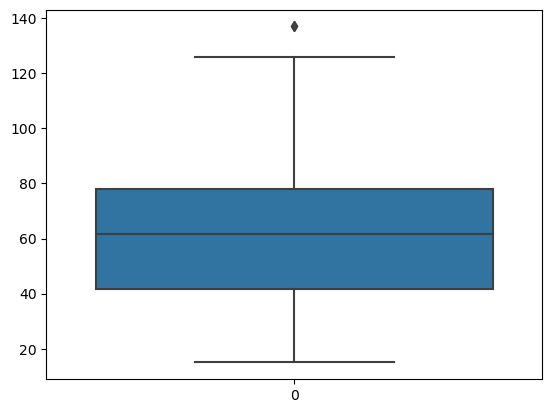

In [18]:
sns.boxplot(data=df['Annual Income (k$)'])

<Axes: >

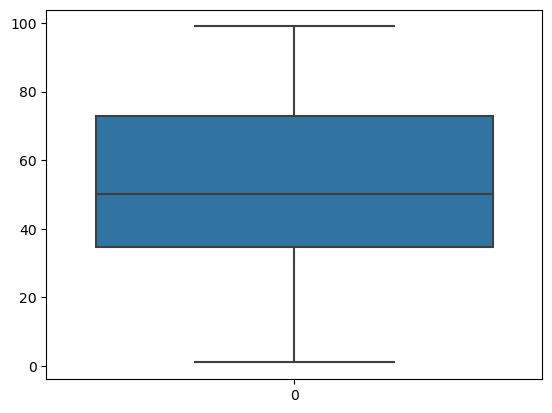

In [19]:
sns.boxplot(data=df['Spending Score (1-100)'])

In [20]:
df.Genre.value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

C:\Users\sai.krishna\AppData\Local\Temp\ipykernel_65164\1994242243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

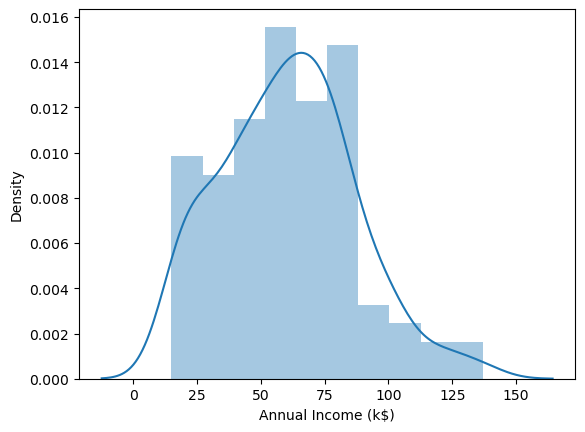

In [23]:
sns.distplot(df['Annual Income (k$)'])

C:\Users\sai.krishna\AppData\Local\Temp\ipykernel_65164\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

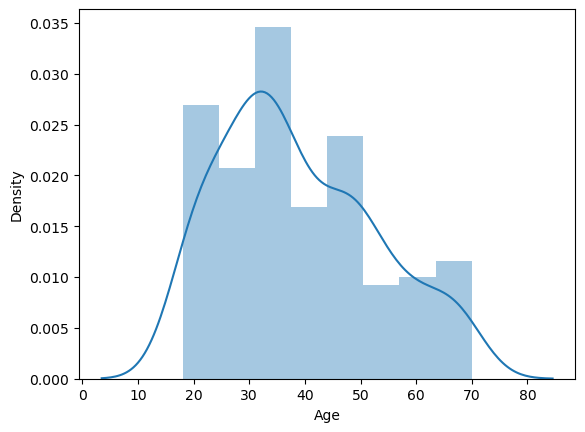

In [25]:
sns.distplot(df['Age'])

C:\Users\sai.krishna\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


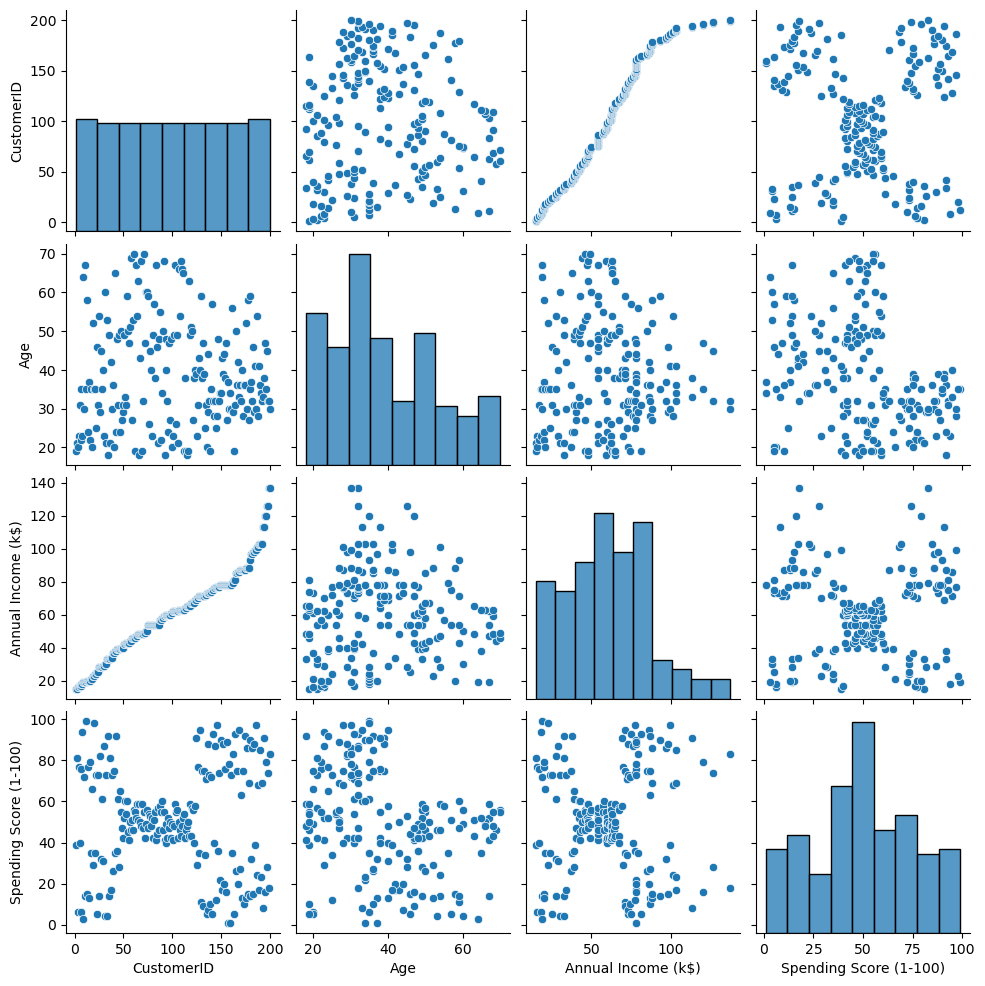

In [26]:
sns.pairplot(df)

In [39]:
import numpy as np

In [42]:
df1=df.select_dtypes(np.number)

<Axes: >

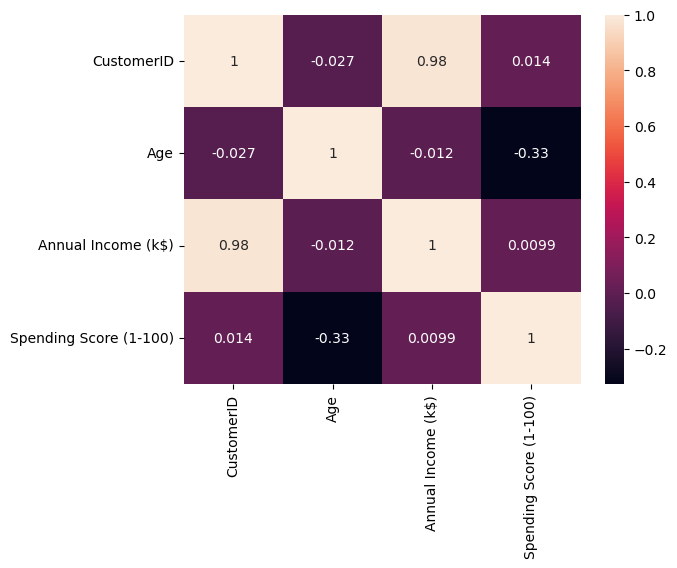

In [44]:
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [45]:
from sklearn.cluster import KMeans

In [47]:
df2=df[['Annual Income (k$)','Spending Score (1-100)']]

In [56]:
inertia = list()
cluster=range(2,10)
for k in cluster:
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(df2)
    inertia.append(km.inertia_)

C:\Users\sai.krishna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sai.krishna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sai.krishna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sai.krishna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

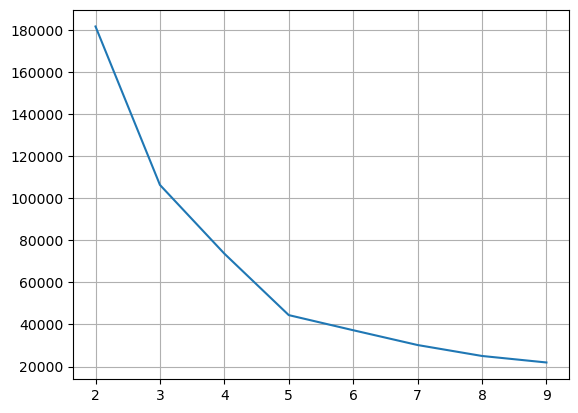

In [57]:
x=cluster,
y=inertia
sns.lineplot(x=cluster,y=inertia)
plt.grid(True)

In [60]:
km=KMeans(n_clusters=5,init='k-means++')
ymeans=km.fit_predict(df2)

C:\Users\sai.krishna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sai.krishna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [61]:
ymeans

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [68]:
df2['ymeans']=km.labels_

C:\Users\sai.krishna\AppData\Local\Temp\ipykernel_65164\1983707635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ymeans']=km.labels_


In [69]:
df2

Annual Income (k$)  Spending Score (1-100)  ymeans
0                    15                      39       2
1                    15                      81       4
2                    16                       6       2
3                    16                      77       4
4                    17                      40       2
..                  ...                     ...     ...
195                 120                      79       0
196                 126                      28       1
197                 126                      74       0
198                 137                      18       1
199                 137                      83       0

[200 rows x 3 columns]

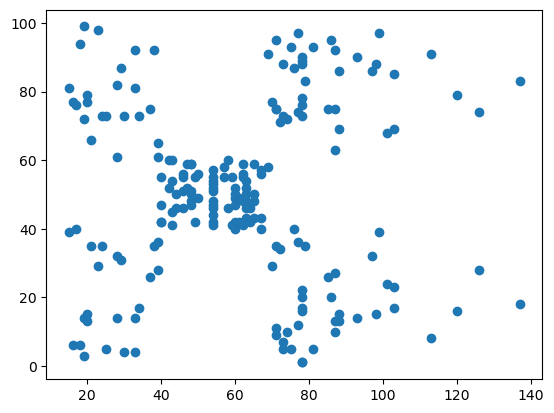

In [65]:
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],)

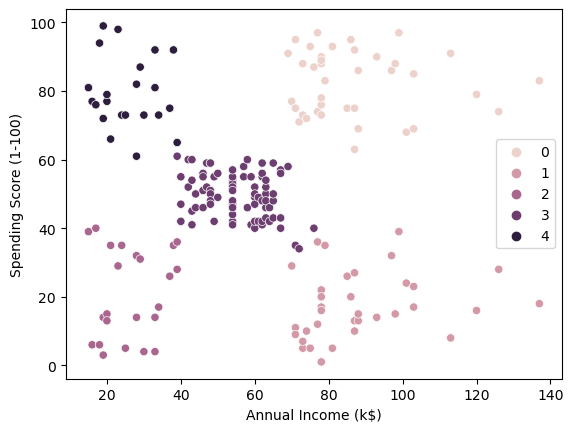

In [75]:
sns.scatterplot(x=df2['Annual Income (k$)'], y=df2['Spending Score (1-100)'], hue=ymeans)
plt.show()

In [ ]:
AgglomerativeClustering